In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (8, 5)

print("Libraries loaded successfully.")


Libraries loaded successfully.


In [2]:
df = pd.read_csv("../data/clean_dataset.csv")
print("Dataset Loaded!")
print(df.shape)
df.head()

Dataset Loaded!
(9581, 49)


NumDots  SubdomainLevel  PathLevel  UrlLength  NumDash  NumDashInHostname  \
0        3               1          5         72        0                  0   
1        3               1          3        144        0                  0   
2        3               1          2         58        0                  0   
3        3               1          6         79        1                  0   
4        3               0          4         46        0                  0   

   AtSymbol  TildeSymbol  NumUnderscore  NumPercent  ...  IframeOrFrame  \
0         0            0              0           0  ...              0   
1         0            0              2           0  ...              0   
2         0            0              0           0  ...              0   
3         0            0              0           0  ...              0   
4         0            0              0           0  ...              1   

   MissingTitle  ImagesOnlyInForm  SubdomainLevelRT  UrlLengthRT  \
0             0                 1                 1            0   
1             0                 0                 1           -1   
2             0                 0                 1            0   
3             0                 0                 1           -1   
4             0                 0                 1            1   

   PctExtResourceUrlsRT  AbnormalExtFormActionR  ExtMetaScriptLinkRT  \
0                     1                       1                   -1   
1                     1                       1                    1   
2                    -1                       1                   -1   
3                     1                       1                    1   
4                    -1                       0                   -1   

   PctExtNullSelfRedirectHyperlinksRT  CLASS_LABEL  
0                                   1            1  
1                                   1            1  
2                                   0            1  
3                                  -1            1  
4                                  -1            1  

[5 rows x 49 columns]

In [3]:
# Combine all feature values into a text field (placeholder)
df["TEXT"] = df.astype(str).agg(" ".join, axis=1)

print("TEXT column added.")
df[["TEXT"]].head()


TEXT column added.


TEXT
0  3 1 5 72 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 21 44...
1  3 1 3 144 0 0 0 0 2 0 2 1 0 41 1 0 0 0 0 0 17 ...
2  3 1 2 58 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 27 24...
3  3 1 6 79 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 22 50...
4  3 0 4 46 0 0 0 0 0 0 0 0 0 2 1 1 0 0 1 0 10 29...

In [4]:
# Identify numeric and text features
numeric_features = df.drop(columns=["CLASS_LABEL", "TEXT"]).columns.tolist()
text_feature = "TEXT"

# Split X / y
X = df[numeric_features + [text_feature]]
y = df["CLASS_LABEL"]

print("Numeric Features:", len(numeric_features))
print("Text Feature:", text_feature)
print("X Shape:", X.shape)
print("y Shape:", y.shape)


Numeric Features: 48
Text Feature: TEXT
X Shape: (9581, 49)
y Shape: (9581,)


In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("Training set:", X_train.shape)
print("Testing set:", X_test.shape)


Training set: (7664, 49)
Testing set: (1917, 49)


In [6]:
from sklearn.compose import ColumnTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_features),
        ("text", TfidfVectorizer(
            stop_words="english",
            max_features=5000,
            ngram_range=(1,2)
        ), "TEXT")
    ]
)

model = Pipeline([
    ("preprocessor", preprocessor),
    ("model", RandomForestClassifier(
        n_estimators=300,
        max_depth=25,
        random_state=42
    ))
])

print("Preprocessor is ready.")


Preprocessor is ready.


In [7]:
from sklearn.pipeline import Pipeline
pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("model", RandomForestClassifier(
        n_estimators=200,
        max_depth=None,
        random_state=42,
        n_jobs=-1
    ))
])

print("Pipeline created.")


Pipeline created.


In [8]:
pipeline.fit(X_train, y_train)
print("Training completed.")


Training completed.


Accuracy: 0.9760041731872717

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.97      0.98      1000
           1       0.97      0.98      0.98       917

    accuracy                           0.98      1917
   macro avg       0.98      0.98      0.98      1917
weighted avg       0.98      0.98      0.98      1917



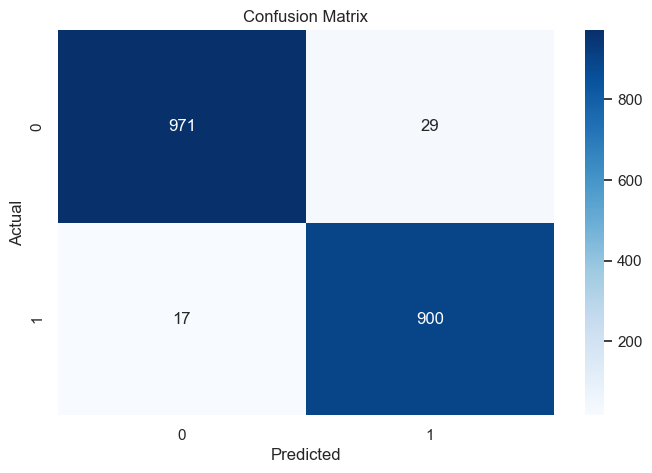

In [9]:
y_pred = pipeline.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [10]:
import os
import joblib
os.makedirs("../src/model", exist_ok=True)
model_path = "../src/model/hybrid_pipeline_model.joblib"

joblib.dump(pipeline, model_path)

print(f"Hybrid pipeline saved at: {model_path}")


Hybrid pipeline saved at: ../src/model/hybrid_pipeline_model.joblib


In [11]:
print(numeric_features)


['NumDots', 'SubdomainLevel', 'PathLevel', 'UrlLength', 'NumDash', 'NumDashInHostname', 'AtSymbol', 'TildeSymbol', 'NumUnderscore', 'NumPercent', 'NumQueryComponents', 'NumAmpersand', 'NumHash', 'NumNumericChars', 'NoHttps', 'RandomString', 'IpAddress', 'DomainInSubdomains', 'DomainInPaths', 'HttpsInHostname', 'HostnameLength', 'PathLength', 'QueryLength', 'DoubleSlashInPath', 'NumSensitiveWords', 'EmbeddedBrandName', 'PctExtHyperlinks', 'PctExtResourceUrls', 'ExtFavicon', 'InsecureForms', 'RelativeFormAction', 'ExtFormAction', 'AbnormalFormAction', 'PctNullSelfRedirectHyperlinks', 'FrequentDomainNameMismatch', 'FakeLinkInStatusBar', 'RightClickDisabled', 'PopUpWindow', 'SubmitInfoToEmail', 'IframeOrFrame', 'MissingTitle', 'ImagesOnlyInForm', 'SubdomainLevelRT', 'UrlLengthRT', 'PctExtResourceUrlsRT', 'AbnormalExtFormActionR', 'ExtMetaScriptLinkRT', 'PctExtNullSelfRedirectHyperlinksRT']
